In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

File = '/content/drive/MyDrive/Algoritmos/Datathon/Datos/IdentificacionSesgo - DataSet29.06.csv'
df = pd.read_csv(File, header = 0)

df['GravedadMode'] = df['Gravedad'].str.split(',',expand=True).mode(axis=1, numeric_only=False, dropna=True)[0]
df = df[['Item (Texto)', 'GravedadMode']]

df = df.sort_values('GravedadMode')

X = df['Item (Texto)'].values
y = df['GravedadMode'].values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
X_train

<116x2628 sparse matrix of type '<class 'numpy.int64'>'
	with 6552 stored elements in Compressed Sparse Row format>

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier(random_state= 42, splitter='random').fit(X_train, y_train)

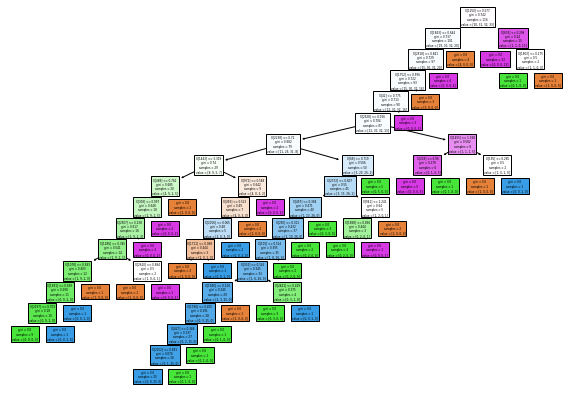

In [56]:
plt.figure(figsize=(10,7))
plot_tree(dt_clf, filled=True);

In [57]:
score = dt_clf.score(X_test, y_test)

In [58]:
print('Accuracy: ', score)

Accuracy:  0.4666666666666667
